In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import OrdinalEncoder

pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None
%matplotlib inline

In [3]:
df = pd.read_pickle('matches.pkl')

print(df.shape)
df.head(1)

(26046, 220)


,match_url,player1,player2,status,Surface,date,k1,k2,player1_win,round,match_duration_mnt,Location,duration_set1,duration_set2,duration_set3,duration_set4,duration_set5,aces_match_player1,aces_match_player2,double_faults_match_player1,double_faults_match_player2,first_serve_prc_match_player1,first_serve_prc_match_player2,first_serve_cnt_match_player1,first_serve_cnt_match_player2,...,receiver_points_won_set5_player1,receiver_points_won_set5_player2,score_set1_player1,score_set1_player2,score_set2_player1,score_set2_player2,score_set3_player1,score_set3_player2,score_set4_player1,score_set4_player2,score_set5_player1,score_set5_player2,tie_break_set1_player1,tie_break_set1_player2,tie_break_set2_player1,tie_break_set2_player2,tie_break_set3_player1,tie_break_set3_player2,tie_break_set4_player1,tie_break_set4_player2,tie_break_set5_player1,tie_break_set5_player2,score_sets,bp_saved_cnt_player1,bp_saved_cnt_player2
0,https://www.sofascore.com/matosevic-querrey/bg...,Matosević M.,Querrey S.,Ended,Hardcourt outdoor,"01 Jan 2014, 05:40",NaN,NaN,1,(R16),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,7.0,7.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
time = []
date_fx = []
months = {"Jan": 1, "Feb": 2, "Mar": 3,
          "Apr": 4, "May": 5, "Jun": 6,
          "Jul": 7, "Aug": 8, "Sep": 9,
          "Oct": 10, "Nov": 11, "Dec": 12
         }
for date in df["date"]:
    mas = date.split()
    date_fx.append(datetime.date(int(mas[2][:-1]), months[mas[1]], int(mas[0])))
    podmas = mas[-1].split(":")
    time.append(datetime.time(int(podmas[0]), int(podmas[1]), 0))
df["time"] = time
df["date"] = date_fx

In [7]:
df.head(1)

,,,match_url,status,Surface,k1,k2,player1_win,round,match_duration_mnt,Location,duration_set1,duration_set2,duration_set3,duration_set4,duration_set5,aces_match_player1,aces_match_player2,double_faults_match_player1,double_faults_match_player2,first_serve_prc_match_player1,first_serve_prc_match_player2,first_serve_cnt_match_player1,first_serve_cnt_match_player2,second_serve_prc_match_player1,second_serve_prc_match_player2,second_serve_cnt_match_player1,...,receiver_points_won_set5_player2,score_set1_player1,score_set1_player2,score_set2_player1,score_set2_player2,score_set3_player1,score_set3_player2,score_set4_player1,score_set4_player2,score_set5_player1,score_set5_player2,tie_break_set1_player1,tie_break_set1_player2,tie_break_set2_player1,tie_break_set2_player2,tie_break_set3_player1,tie_break_set3_player2,tie_break_set4_player1,tie_break_set4_player2,tie_break_set5_player1,tie_break_set5_player2,score_sets,bp_saved_cnt_player1,bp_saved_cnt_player2,time
date,player1,player2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,Matosević M.,Querrey S.,https://www.sofascore.com/matosevic-querrey/bg...,Ended,Hardcourt outdoor,NaN,NaN,1,(R16),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,7.0,7.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05:40:00


In [6]:
df = df.set_index(["date", "player1", "player2"])

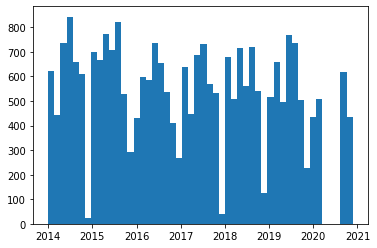

In [8]:
plt.hist(df.index.get_level_values('date'), bins=50);

In [9]:
history_from = '2014-01-01'
df = df[df.index.get_level_values('date') >= history_from]
print(df.shape)

(26046, 218)


In [5]:
df['p1_age'] = (df.index.get_level_values('date') - df['p1_birthdate']).dt.days / 365
df['p2_age'] = (df.index.get_level_values('date') - df['p2_birthdate']).dt.days / 365

In [6]:
df['p1_birthday_today'] = \
    (df['p1_birthdate'].dt.month == df.index.get_level_values('date').month) & \
    (df['p1_birthdate'].dt.day == df.index.get_level_values('date').day)

df['p2_birthday_today'] = \
    (df['p2_birthdate'].dt.month == df.index.get_level_values('date').month) & \
    (df['p2_birthdate'].dt.day == df.index.get_level_values('date').day)

In [7]:
df['hour'] = df['time'].map(lambda x: x.hour)

In [8]:
# df['n_sets'] = df['total_score'].map(lambda x: sum(x) if x else np.nan)

In [8]:
df['p1_home'] = (df['country'] == df['p1_country'])
df['p2_home'] = (df['country'] == df['p2_country'])

In [9]:
df['p1_start_card'] = df['p1_start_card'].fillna('N/A')
df['p2_start_card'] = df['p2_start_card'].fillna('N/A')

card_encoder = OrdinalEncoder()
card_encoder.fit(df['p1_start_card'].values.reshape(-1,1));

df['p1_start_card'] = card_encoder.transform(df['p1_start_card'].values.reshape(-1,1));
df['p2_start_card'] = card_encoder.transform(df['p2_start_card'].values.reshape(-1,1));

In [10]:
df['surface'] = df['surface'].fillna('N/A')

surface_encoder = OrdinalEncoder()
df['surface'] = surface_encoder.fit_transform(df['surface'].values.reshape(-1,1));

In [11]:
df['round'] = df['round'].fillna('N/A')

round_encoder = OrdinalEncoder()
df['round'] = round_encoder.fit_transform(df['round'].values.reshape(-1,1));

In [12]:
df['minutes'] = df['minutes'].map(lambda x: sum(x) if x else np.nan)

In [13]:
def get_k(odds, idx, agg_func=np.mean):
    if not odds:
        return np.nan
    arr = [ks[idx] for bm, ks in odds.items()]
    filt = list(filter(lambda x: isinstance(x, float) and not np.isnan(x), arr))
    agg = agg_func(filt) if filt else np.nan
    return agg

df['p1_k_avg'] = df['odds'].map(lambda x: get_k(x, idx=0))
df['p2_k_avg'] = df['odds'].map(lambda x: get_k(x, idx=1))

df['p1_k_std'] = df['odds'].map(lambda x: get_k(x, idx=0, agg_func=np.std))
df['p2_k_std'] = df['odds'].map(lambda x: get_k(x, idx=1, agg_func=np.std))

df['p1_k_max'] = df['odds'].map(lambda x: get_k(x, idx=0, agg_func=np.max))
df['p2_k_max'] = df['odds'].map(lambda x: get_k(x, idx=1, agg_func=np.max))

In [14]:
n_last = 7
players = set(df.index.get_level_values('p1_name').tolist() + \
              df.index.get_level_values('p2_name').tolist())

def generate_feature_name(name, idx):
    prefix = 'p1_' if idx == 0 else 'p2_'
    return prefix + name

def count_history_matches(res, idx):
    fname = generate_feature_name('played_before', idx)
    return {fname: len(res)}

def count_history_wins(res, hist_idx, idx):
    fname = generate_feature_name('won_before', idx)
    res = res.dropna().astype(bool)
    n_won = res[hist_idx == 0].sum() + (~res)[hist_idx == 1].sum()
    return {fname: n_won}

def sum_history_minutes(res, idx):
    fname = generate_feature_name('minutes_before', idx)
    return {fname: res.sum()}


hist_features = defaultdict(dict)

for p_name in players:
    p_hist = df[(df.index.get_level_values('p1_name') == p_name) | \
                (df.index.get_level_values('p2_name') == p_name)]

    p_hist['idx'] = (p_hist.index.get_level_values('p2_name') == p_name).astype(int)
    idx_date = p_hist.index.get_level_values('date')
    
    for i, row in p_hist.iterrows():
        windowed = p_hist[(idx_date < i[0]) & \
                            (idx_date >= i[0] - pd.Timedelta(n_last, 'd'))]
        p_idx = row['idx']
        h_idx = windowed['idx']

        hist_features[i].update(count_history_matches(windowed['p1_won'], p_idx))
        hist_features[i].update(count_history_wins(windowed['p1_won'], h_idx, p_idx))
        hist_features[i].update(sum_history_minutes(windowed['minutes'], p_idx))

In [15]:
hist_df = pd.DataFrame.from_dict(hist_features, orient='index')
hist_df.index.names = df.index.names

assert hist_df.shape[0] == df.shape[0]

In [16]:
df = pd.merge(df, hist_df, left_index=True, right_index=True)

In [1]:
features_from = '2015-01-01'

cols2keep = [
    'surface', 'round', 'is_qual', 'hour', 'p1_won',
    'p1_start_pos', 'p2_start_pos', 'p1_start_card', 'p2_start_card',
    'p1_age', 'p2_age', 'p1_birthday_today', 'p2_birthday_today',
    'p1_home', 'p2_home', 
    'p1_k_avg', 'p2_k_avg', 
    'p1_k_max', 'p2_k_max',
    'p1_k_std', 'p2_k_std',
    
    'p1_played_before', 'p1_won_before', 'p1_minutes_before',
    'p2_played_before', 'p2_won_before', 'p2_minutes_before',
]

data = df.loc[df.index.get_level_values('date') > features_from, cols2keep] \
    .dropna(subset=['p1_won'])

print(data.shape[0])
data.head()

NameError: name 'df' is not defined

In [ ]:
data[data.index.get_level_values('date').year==2019].groupby(data[data.index.get_level_values('date').year==2019].index.get_level_values('date').month).size()

In [20]:
data.to_pickle('data/final_data.pkl')